In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('mushroom_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [28]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [5]:
df.sample(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
46462,687,6,4,3,1.595149,2267,11,0.888450,0
42633,271,0,0,5,0.982385,197,6,0.943195,1
40632,202,0,0,4,0.267018,221,11,0.027372,0
31512,237,6,0,10,1.090669,196,11,0.888450,1
51797,259,3,3,2,2.013794,0,2,0.027372,1


In [6]:
df.corr()['class']

cap-diameter      -0.165676
cap-shape         -0.133338
gill-attachment   -0.052541
gill-color        -0.063947
stem-height        0.183354
stem-width        -0.182856
stem-color        -0.128339
season            -0.082919
class              1.000000
Name: class, dtype: float64

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

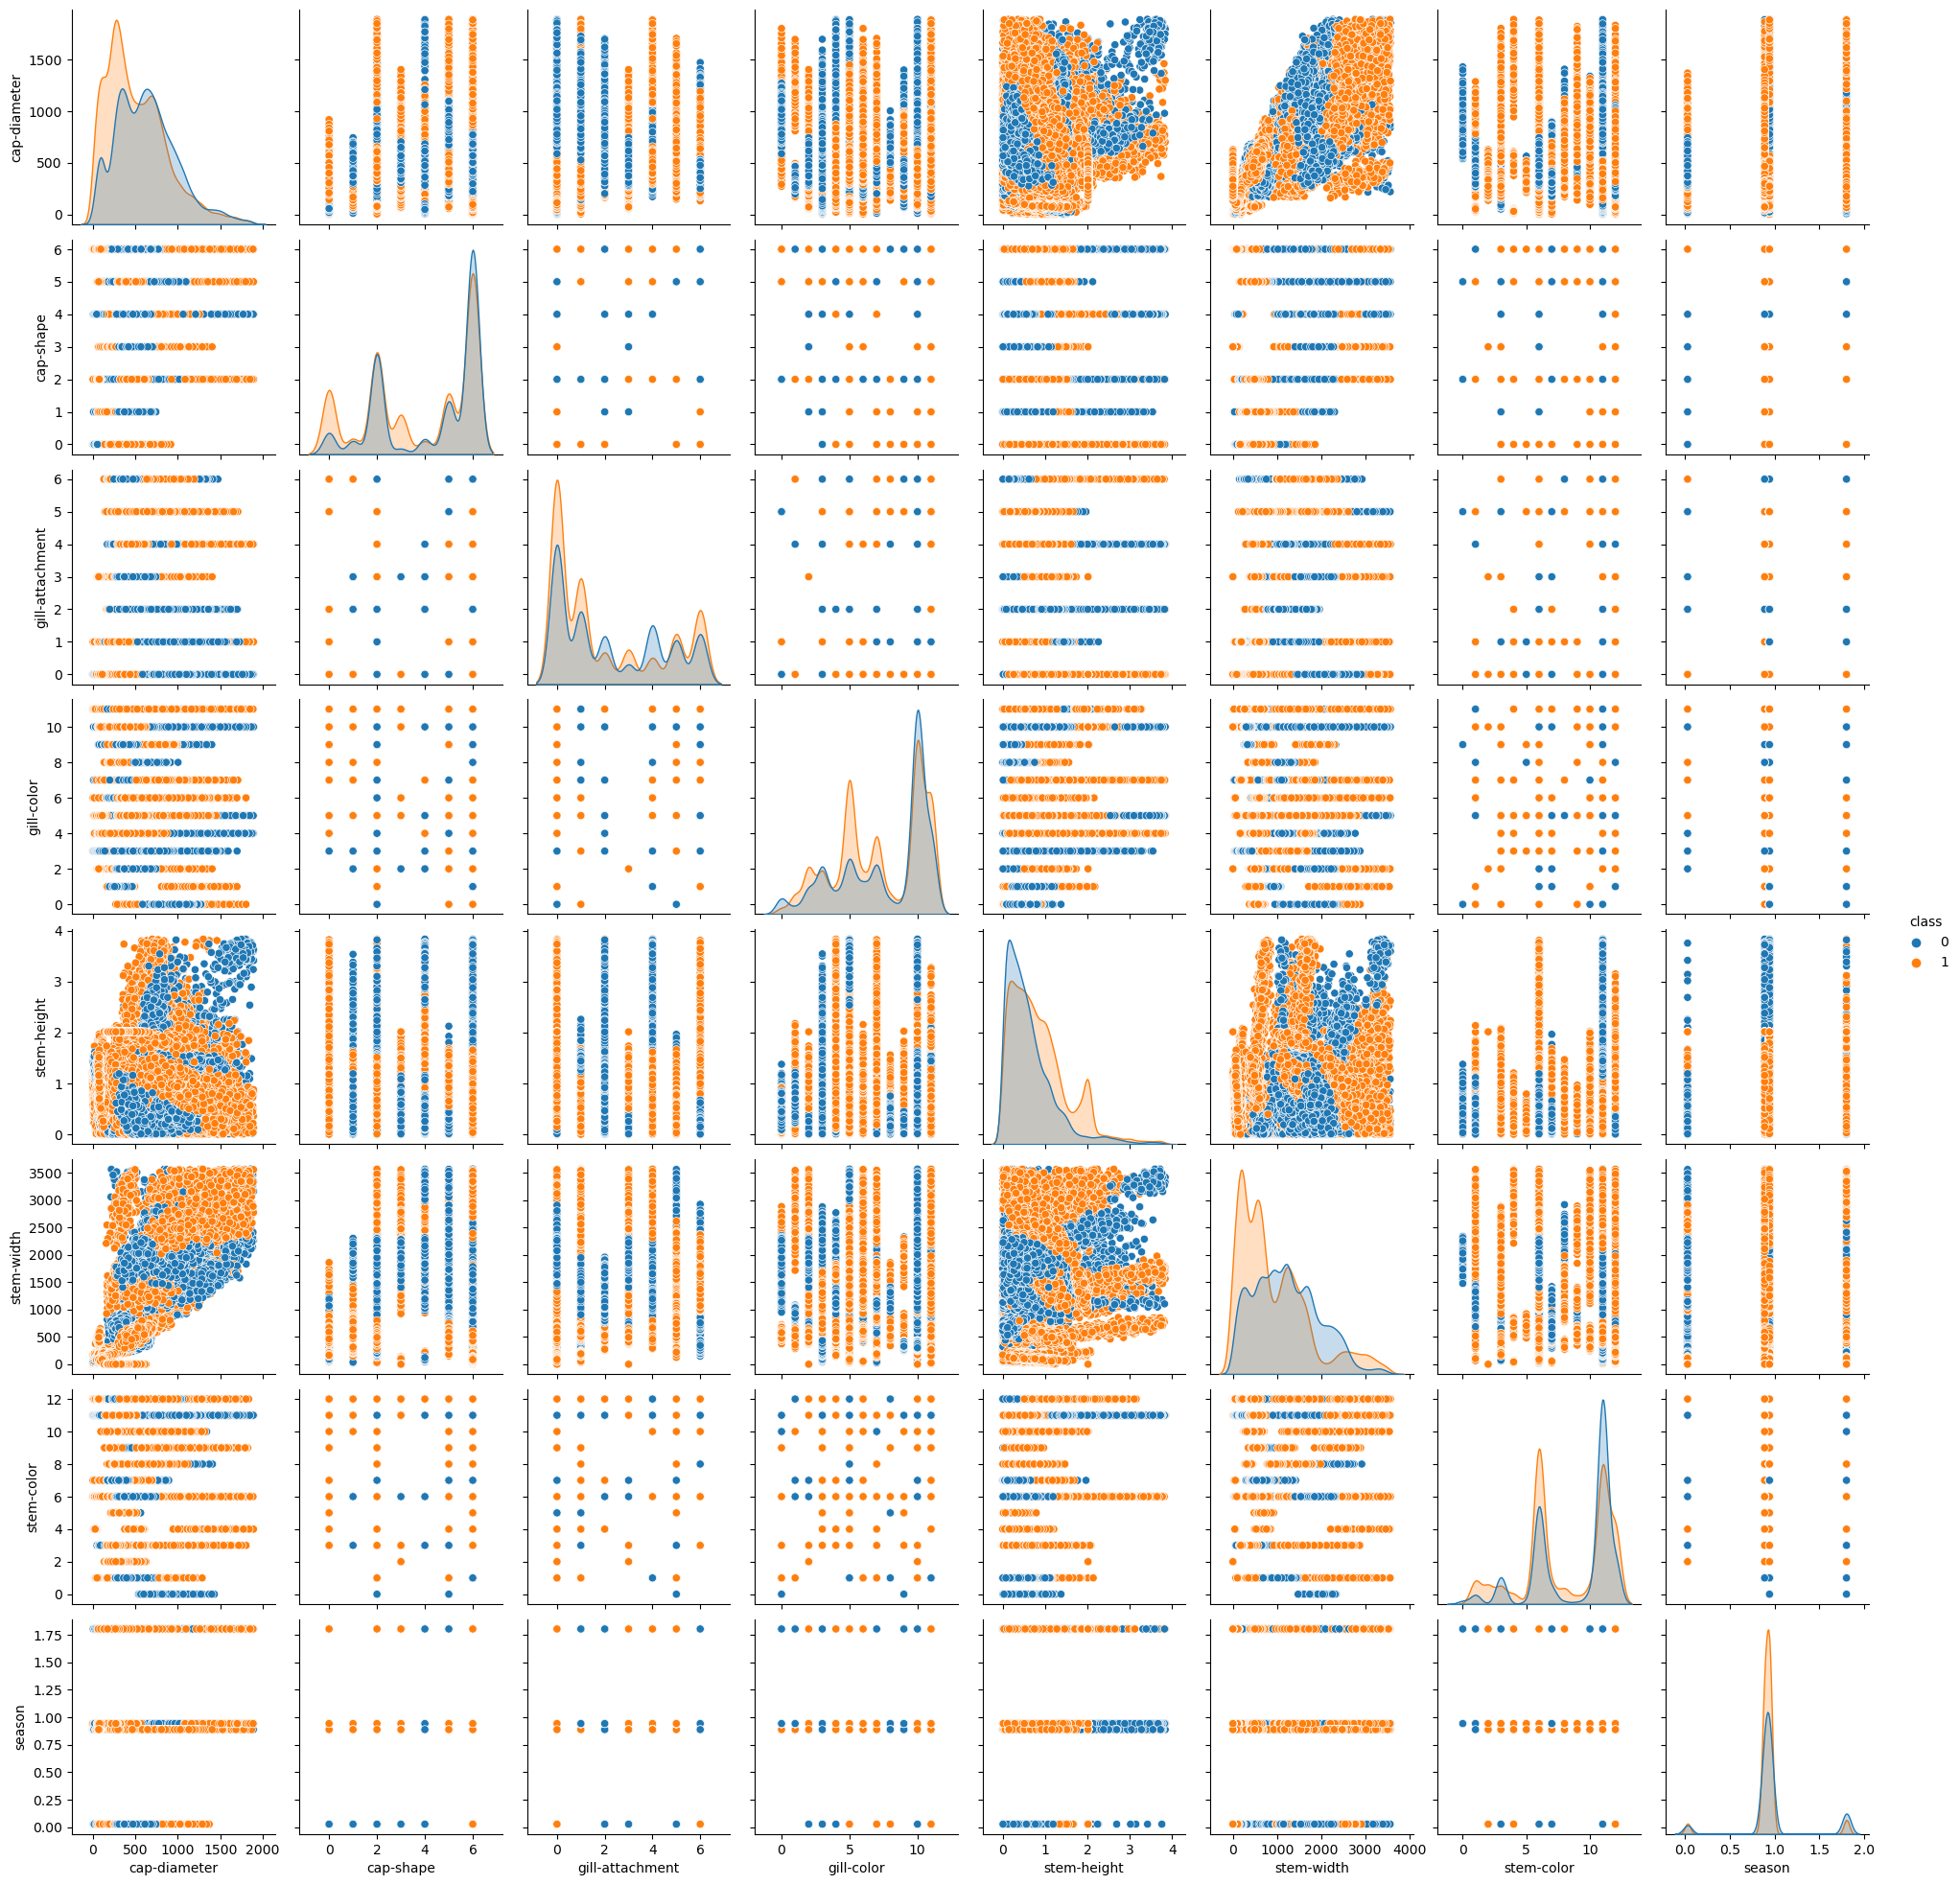

In [7]:
sns.pairplot(data=df,hue='class')

<Axes: >

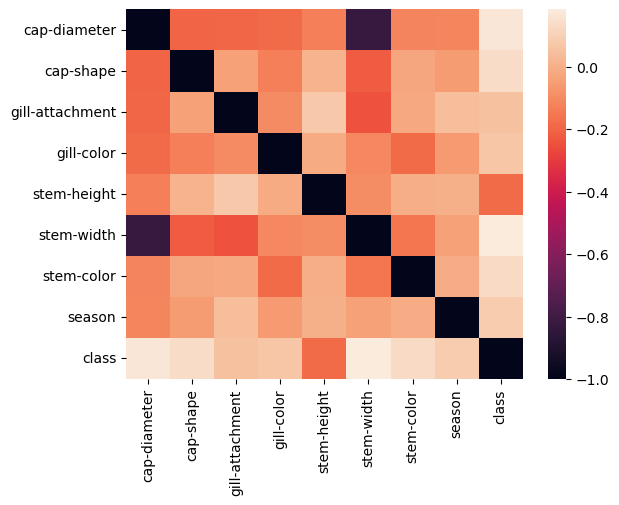

In [15]:
sns.heatmap(data=-df.corr())


In [29]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df)
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [11]:
df.sample()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
5203,578,6,1,10,0.251102,966,6,1.804273,1


In [12]:
# after feature seleaction i removed 'cap-shape','season'
x=df.drop(['class'],axis=1)
y=df.iloc[:,-1]
x

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1=rf.predict(X_test)
accuracy_score(y_pred1,y_test)

0.9906542056074766

In [15]:
importances=rf.feature_importances_
features=X_train.columns
feature_importance=pd.Series(importances, index=features).sort_values(ascending=False)
feature_importance

stem-width         0.223514
gill-attachment    0.144303
gill-color         0.128062
cap-diameter       0.127328
stem-color         0.126220
stem-height        0.120182
cap-shape          0.092371
season             0.038020
dtype: float64

In [95]:
models=[RandomForestClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier(),
        LogisticRegression(),
        SGDClassifier(),
        SVC(),
        DummyClassifier(),
        DecisionTreeClassifier(),
        ExtraTreeClassifier()]

In [99]:

import time
Name=[]
Accuracy=[]
Precision=[]
Recall=[]
Time_Taken=[]
for model in models:
    Name.append(type(model).__name__)
    begin=time.time()
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    end=time.time()
    accuracyscore=accuracy_score(prediction,y_test)
    Accuracy.append(accuracyscore)
    precisionScore = precision_score(prediction,y_test)
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test)
    Recall.append(recallScore)
    Time_Taken.append(end-begin)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Recall,Precision,Time Taken
0,RandomForestClassifier,0.991302,0.991198,0.992879,3.893263
1,AdaBoostClassifier,0.765522,0.773674,0.806205,1.226389
2,BaggingClassifier,0.985380,0.989093,0.984062,1.115880
3,GradientBoostingClassifier,0.884797,0.897624,0.890471,4.204571
4,KNeighborsClassifier,0.716388,0.741765,0.736860,0.568902
5,LogisticRegression,0.635236,0.650415,0.717023,0.231774
6,SGDClassifier,0.528731,0.775496,0.192099,1.178054
7,SVC,0.645508,0.667423,0.698542,155.829684
8,DummyClassifier,0.545757,0.545757,1.000000,0.001002
9,DecisionTreeClassifier,0.977977,0.977718,0.982028,0.163995


In [14]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'criterion':['gini' , 'entropy'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True,False]
    
}

In [16]:
grif_search= RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2,n_iter=20,random_state=42,)

In [17]:
grif_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [20]:
best_params=grif_search.best_params_
best_score=grif_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
Best Score: 0.9895437841922373


In [21]:
best_model = grif_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Test Score: 0.991301933931711


In [16]:
pipe=Pipeline([('standardScaler',StandardScaler()),
              ('randomforest',RandomForestClassifier(n_estimators= 100, 
              min_samples_split=5, 
              min_samples_leaf=1, 
            max_features='sqrt',
            max_depth=30,
        criterion='entropy', 
        bootstrap= True))])

In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('randomforest',
                 RandomForestClassifier(criterion='entropy', max_depth=30,
                                        min_samples_split=5))])

In [18]:
y_pred=pipe.predict(X_test)

In [19]:
accuracy_score(y_pred,y_test)

0.9905616729897289

In [22]:
result=cross_val_score(pipe,X_train,y_train,cv=5,n_jobs=-1)
result.mean()

0.9894049702808241

In [23]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))

In [25]:
X_train.sample()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
35080,131,4,0,5,0.266167,209,12,0.027372


In [26]:
X_train.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000
mean,567.675442,3.994795,2.138267,7.324859,0.759497,1052.557116,8.420561,0.951277
std,360.584357,2.162429,2.228573,3.201606,0.652320,783.231965,3.261763,0.304490
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450
50%,526.000000,5.000000,1.000000,7.000000,0.593295,925.000000,11.000000,0.943195
75%,782.000000,6.000000,4.000000,10.000000,1.054858,1527.000000,11.000000,0.943195
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273


In [30]:
df['stem-width'].unique()

array([1545, 1557, 1566, ..., 3271, 2738, 2995], dtype=int64)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43228 entries, 10135 to 15795
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     43228 non-null  int64  
 1   cap-shape        43228 non-null  int64  
 2   gill-attachment  43228 non-null  int64  
 3   gill-color       43228 non-null  int64  
 4   stem-height      43228 non-null  float64
 5   stem-width       43228 non-null  int64  
 6   stem-color       43228 non-null  int64  
 7   season           43228 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.0 MB
